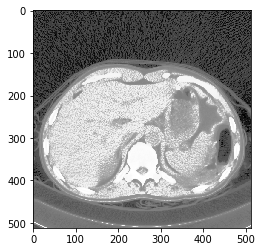

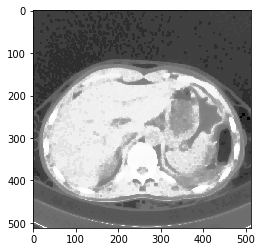

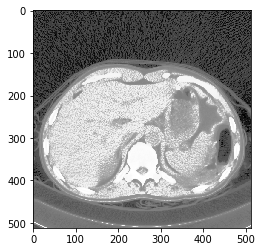

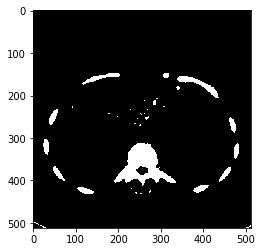

In [1]:
import pydicom
import cv2
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
im=pydicom.dcmread('dicom_dir/ID_0072_AGE_0060_CONTRAST_0_CT.dcm')
photo=np.array(im.pixel_array)
photo=np.uint8(cv2.normalize(photo, None, 0, 255, cv2.NORM_MINMAX))
photo=cv2.equalizeHist(photo)
image_new=PIL.Image.frombytes('L',
                          (photo.shape[1],photo.shape[0]), photo.astype('b').tostring())
image=np.asarray(image_new)

plt.figure(0)
plt.imshow(image_new, cmap='gray')
#histr = cv2.calcHist([image],[0],None,[256],[0,256]) 
kernel = np.ones((5,5),np.uint8)
c=cv2.dilate(image,kernel)
h=cv2.erode(c,kernel)
plt.figure(1)
plt.imshow(h,cmap='gray')
blur=cv2.medianBlur(h,3)
plt.figure(2)
plt.imshow(image, cmap='gray')
#blur=cv2.bilateralFilter(blur, 3,15,15)
#plt.figure(3)
#plt.imshow(blur, cmap='gray')
ret, thresh1 = cv2.threshold(blur, 243, 255,cv2.THRESH_BINARY)
plt.figure(4)
plt.imshow(thresh1, cmap='gray')
#opening=cv2.erode(cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel),kernel, iterations=1)
#plt.figure(5)
#plt.imshow(opening, cmap='gray')

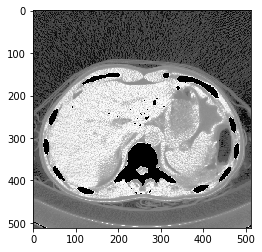

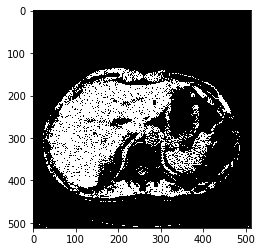

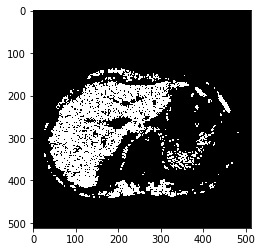

In [2]:
imi=image.copy()
imi[thresh1>0]=0
plt.figure(0)
plt.imshow(imi,cmap='gray')
#b_blur=cv2.medianBlur(imi,3)
ret, thresh = cv2.threshold(imi, 200, 255,cv2.THRESH_BINARY)
plt.figure(1)
plt.imshow(thresh, cmap='gray')
kernel = np.ones((3,3),np.uint8)
c=cv2.erode(thresh,kernel)
h=cv2.dilate(c,kernel)
plt.figure(2)
plt.imshow(h,cmap='gray')

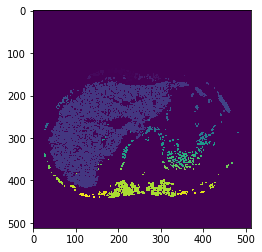

In [3]:
ret,markers= cv2.connectedComponents(h)
plt.imshow(markers)

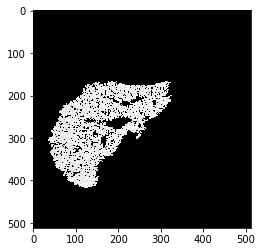

In [4]:
maker=[np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
large=np.argmax(maker)+1

mask=markers==large
brin=image.copy()
brin[mask==False]=0
plt.figure(0)
plt.imshow(brin, cmap='gray')

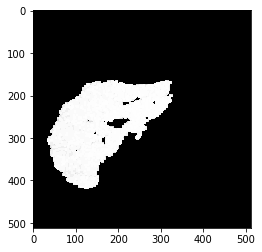

In [5]:
kernel = np.ones((5,5),np.uint8)
x=cv2.dilate(brin,kernel)
cc=cv2.erode(x,kernel)
cc=cv2.dilate(cc,kernel)
plt.figure(0)
plt.imshow(cc,cmap='gray')

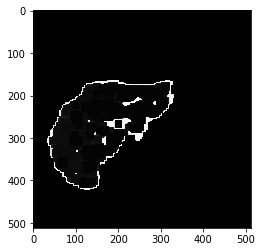

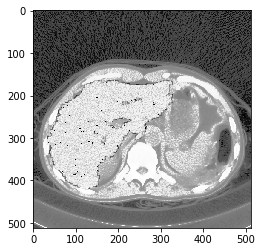

In [6]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(cc, cv2.MORPH_GRADIENT, kernel)
er=cv2.erode(gradient,kernel)
gradient=gradient-er
k = np.ones((16,16),np.uint8)
closing = cv2.morphologyEx(gradient, cv2.MORPH_CLOSE, k)
plt.figure(2)
plt.imshow(closing,cmap='gray')
out=image.copy()
plt.figure(0)
plt.imshow(out+gradient+gradient,cmap='gray')